<a href="https://colab.research.google.com/github/gary464/COLAB-For-Teaching-CS-in-Non-CS-Classrooms/blob/main/3_Function_Animation_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Let's create a simple plot of the function y = x^2**

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


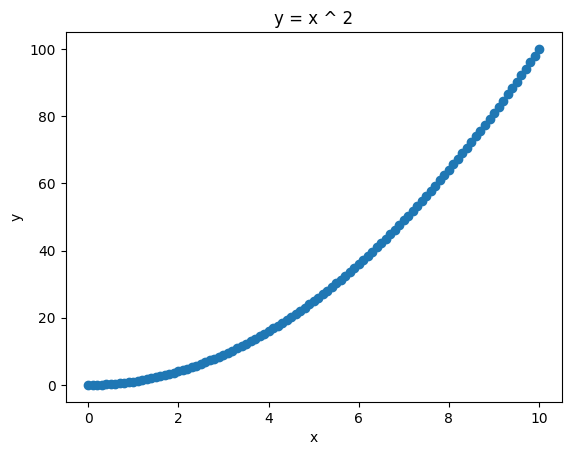

In [ ]:
# Import some libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create an array of 101 x's from 0 to 10 - this creates values 0f 0.0, 0.1, 0.2 ... 10.0
x = np.linspace(0, 10, 101)
print(x)  # This is not needed, just shows you the array x

# Make y a function of x
y = x ** 2 #remember, we use ** to raise a variable to a power

# Create a figure and axis - we are doin this is a bit more of a complex way
# in order to pass this plot into an animation procedure
fig, ax = plt.subplots()

# Plot the data
# assign the line object to 'line'
line, = ax.plot(x, y, marker='o')
# Set the title of the plot using ax.set_title()
ax.set_title('y = x ^ 2')
# Set the x-axis label using ax.set_xlabel()
ax.set_xlabel('x')
# Set the y-axis label using ax.set_ylabel()
ax.set_ylabel('y')


# Use plt.show() to display the plot
plt.show()


Now we'll use matplotlib funcanimation to animate the line in the graph

Here is a link to the documentation from matplotlib:

https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html

Let's take a look at the key information:

We will create an animation using the following information

ani = animation.FuncAnimation(fig, func, frames, interval,      fargs)

**fig** - was already defined above.

**Func** - We define a function to update the look of the plot.  The actual function is like taking a recording on your phone.  It updates the function takes a "picture" then updates it again and takes another picture.  Each one of these "frames" is saved and then run rapidly together in the animation, much like a movie reel.

In this case we create a function called aniframes which takes in the arguments frames (created in the funcanimation command), x, y, and lines.

**frames** - this is an index which allows us to step through our function.  Note, here we set the index to have a length equal to the length of the x array created earlier (in this case it will have a length of 101)

**interval** - the time interval between frames in msec (1/1000 sec)

**fargs** - Function Arguments - these are the arguments which will bew used by the function - in this case, x, y, and lines.

We finish with a save command to export the animation file to our directory:

ani.save('animated_plot.gif', writer='pillow', fps=60)

In order to display the gif, you need to go to your file directory to locate it.

In [ ]:
# Now we will animate the line within the plot
#

def aniframes(frames, x, y, line):
    line.set_data(x[:frames], y[:frames]) # the ':frames' means to use data upto the current frame to plot the line
    return line,

ani = animation.FuncAnimation(fig, aniframes, frames = len(x), interval=100,
                              fargs=[x, y, line])
ani.save('animated_plot.gif', writer='pillow', fps=60)

# Go to your directory to diplay the gif

**Now let's look at plotting just the location of the data point in the current cell (elimintae all history).**

We will rewrite graph as a scatter plot to eliminat the line connectine the dots.

We will also use the clear() command to elimiate the data from prior cells in our update command.

We will start this from scrach by copyinf the initial information forom the first plot through line 17.  Then comment out line 9.

In [ ]:
# Import some libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create an array of 101 x's from 0 to 10 - this creates values 0f 0.0, 0.1, 0.2 ... 10.0
x = np.linspace(0, 10, 101)
# print(x)  # This is not needed, just shows you the array x

# Make y a function of x
y = x ** 2 #remember, we use ** to raise a variable to a power

# Create a figure and axis - we are doin this is a bit more of a complex way
# in order to pass this plot into an animation procedure
fig, ax = plt.subplots()

# Plot the initial scatter plot
# assign the PathCollection object to 'scatter_plot'
scatter_plot = plt.scatter(x, y, marker ='o')

def aniframes(frames, x, y, scatter_plot):
    ax.clear()
    # note - since we only want the current data point use 'frames not ':frames'
    scatter_plot = plt.scatter(x[frames], y[frames], marker ='o')
    ax.set_title('y = x ^ 2')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Sets the axes for the scatterplot, if you don't do this the axes change and dot remains at center
    ax.set_xlim(0,10)
    ax.set_ylim(1,100)
    return scatter_plot,

ani = animation.FuncAnimation(fig, aniframes, frames = len(x), interval=100,
                              fargs=[x, y, scatter_plot])
ani.save('animated__dot_plot.gif', writer='pillow', fps=60)
# The .gif is savedin the files folder on the left, you need to open the .gif to see result